# Sales Data Analysis

##### You are a data analyst at a retail company that sells various products across multiple regions. The company has collected sales data for the past year, and your task is to analyze this data to gain insights into sales performance, customer behavior, and product popularity.

In [26]:
import numpy as num
import pandas as pd
from IPython.display import display
from tabulate import tabulate


df = pd.read_csv('sales_data.csv')

#### Show full table and its contents

In [17]:
display(df.head())
display(df.info())

,order_id,ProductID,ProductName,Category,Quantity,Price,TotalPrice,OrderDate,CustomerID,Region
0,1,2500,Shampoo,cosmetics,9200,1200,1500,21100,211000,RYK
1,2,2630,Soap,cosmetics,6100,2100,1200,18330,183300,RYK
2,3,2140,Liquid Soap,liq cosmetics,9550,3550,1340,22470,224700,SWL
3,4,3400,Tezaab,Acid Cleaner,8870,1870,1130,22270,222700,RWP
4,5,3600,Tooth Brush,Med Cleaner,7760,1560,1740,20960,209600,ISL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     12 non-null     int64 
 1   ProductID    12 non-null     int64 
 2   ProductName  12 non-null     object
 3   Category     12 non-null     object
 4   Quantity     12 non-null     int64 
 5   Price        12 non-null     int64 
 6   TotalPrice   12 non-null     int64 
 7   OrderDate    12 non-null     int64 
 8   CustomerID   12 non-null     int64 
 9   Region       12 non-null     object
dtypes: int64(7), object(3)
memory usage: 1.1+ KB


None

#### Show only 5 rows

In [3]:
df.head()

,order_id,ProductID,ProductName,Category,Quantity,Price,TotalPrice,OrderDate,CustomerID,Region
0,1,2500,Shampoo,cosmetics,9200,1200,1500,21100,211000,RYK
1,2,2630,Soap,cosmetics,6100,2100,1200,18330,183300,RYK
2,3,2140,Liquid Soap,liq cosmetics,9550,3550,1340,22470,224700,SWL
3,4,3400,Tezaab,Acid Cleaner,8870,1870,1130,22270,222700,RWP
4,5,3600,Tooth Brush,Med Cleaner,7760,1560,1740,20960,209600,ISL


### Cleaning!
- dropna(): This method is used to remove missing values.
- inplace=True: This modifies the DataFrame in place, meaning it does not return a new DataFrame but changes the original one.


In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     12 non-null     int64 
 1   ProductID    12 non-null     int64 
 2   ProductName  12 non-null     object
 3   Category     12 non-null     object
 4   Quantity     12 non-null     int64 
 5   Price        12 non-null     int64 
 6   TotalPrice   12 non-null     int64 
 7   OrderDate    12 non-null     int64 
 8   CustomerID   12 non-null     int64 
 9   Region       12 non-null     object
dtypes: int64(7), object(3)
memory usage: 1.1+ KB
None


### Tips!
- ascending=False : Sorts the resulting DataFrame in descending order.
- The tabulate library can help in printing well-aligned tables.

In [29]:
product_sales = df.groupby('ProductName').agg({'TotalPrice': 'sum', 'order_id': 'count'}).rename(columns={'order_id': 'NumberOfOrders'}).sort_values(by='TotalPrice', ascending=False)
print(tabulate(product_sales.head(), headers='keys', tablefmt='psql'))

category_sales = df.groupby('Category').agg({'TotalPrice': 'sum', 'order_id': 'count'}).rename(columns={'order_id': 'NumberOfOrders'}).sort_values(by='TotalPrice', ascending=False)

# display(category_sales)
print(tabulate(category_sales.head(), headers='keys', tablefmt='psql'))

+---------------+--------------+------------------+
| ProductName   |   TotalPrice |   NumberOfOrders |
|---------------+--------------+------------------|
| Perfume       |         2100 |                1 |
| Oil           |         1890 |                1 |
| Knife         |         1780 |                1 |
| Crockery      |         1760 |                1 |
| Tooth Brush   |         1740 |                1 |
+---------------+--------------+------------------+
+-------------+--------------+------------------+
| Category    |   TotalPrice |   NumberOfOrders |
|-------------+--------------+------------------|
| cosmetics   |         4800 |                3 |
| kitchen     |         3180 |                2 |
| Food        |         1890 |                1 |
| Kitchen     |         1760 |                1 |
| Med Cleaner |         1740 |                1 |
+-------------+--------------+------------------+


### Some Info! 
- 1. df.resample('M'): This method is used to resample time-series data. Here, 'M' stands for monthly frequency.
- 2. resample() is used to change the frequency of time-series data. It’s commonly used for time-series analysis to aggregate or fill data points over specified time intervals.

In [30]:
unique_customers = df['CustomerID'].nunique()
print(f'Total unique customers: {unique_customers}')

aov = df['TotalPrice'].mean()
print(f'Average Order Value (AOV): {aov:.2f}')

top_customers = df.groupby('CustomerID').agg({'TotalPrice': 'sum'}).sort_values(by='TotalPrice', ascending=False).head(10)
# print(top_customers)
print(tabulate(top_customers.head(), headers='keys', tablefmt='psql'))

Total unique customers: 12
Average Order Value (AOV): 1542.92
+--------------+--------------+
|   CustomerID |   TotalPrice |
|--------------+--------------|
|       412800 |         2100 |
|       266700 |         1890 |
|       234000 |         1780 |
|       300200 |         1760 |
|       209600 |         1740 |
+--------------+--------------+


In [31]:
regional_sales = df.groupby('Region').agg({'TotalPrice': 'sum', 'order_id': 'count'}).rename(columns={'order_id': 'NumberOfOrders'}).sort_values(by='TotalPrice', ascending=False)
# print(regional_sales)
print(tabulate(regional_sales.head(), headers='keys', tablefmt='psql'))
region_popular_products = df.groupby(['Region', 'ProductName']).agg({'TotalPrice': 'sum'}).sort_values(by='TotalPrice', ascending=False).groupby(level=0).head(1)
# print(region_popular_products)
print(tabulate(region_popular_products.head(), headers='keys', tablefmt='psql'))

+----------+--------------+------------------+
| Region   |   TotalPrice |   NumberOfOrders |
|----------+--------------+------------------|
| LHR      |         7530 |                4 |
| RYK      |         2700 |                2 |
| RWP      |         2685 |                2 |
| SWL      |         2460 |                2 |
| ISL      |         1740 |                1 |
+----------+--------------+------------------+
+-------------------------+--------------+
|                         |   TotalPrice |
|-------------------------+--------------|
| ('LHR', 'Perfume')      |         2100 |
| ('ISL', 'Tooth Brush')  |         1740 |
| ('RWP', 'Toilet Brush') |         1555 |
| ('RYK', 'Shampoo')      |         1500 |
| ('KRC', 'scissors')     |         1400 |
+-------------------------+--------------+


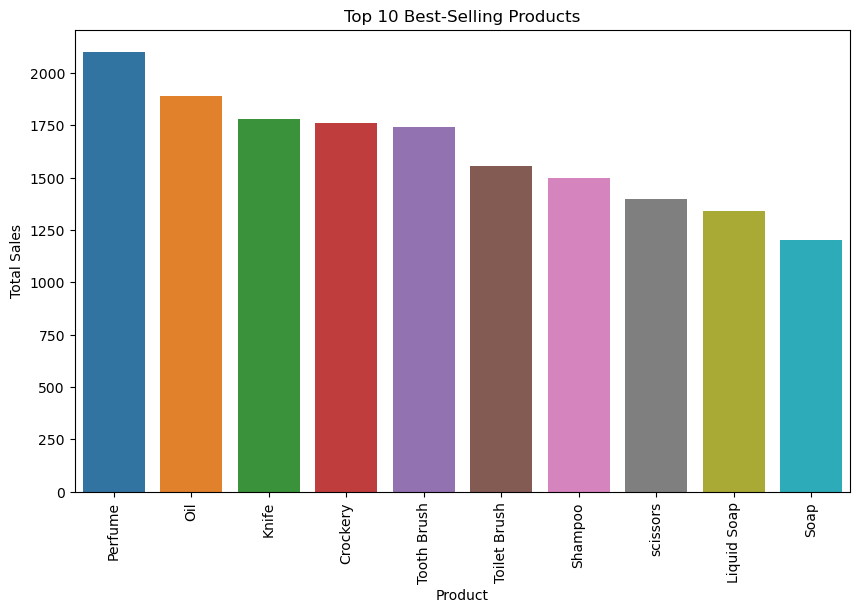

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


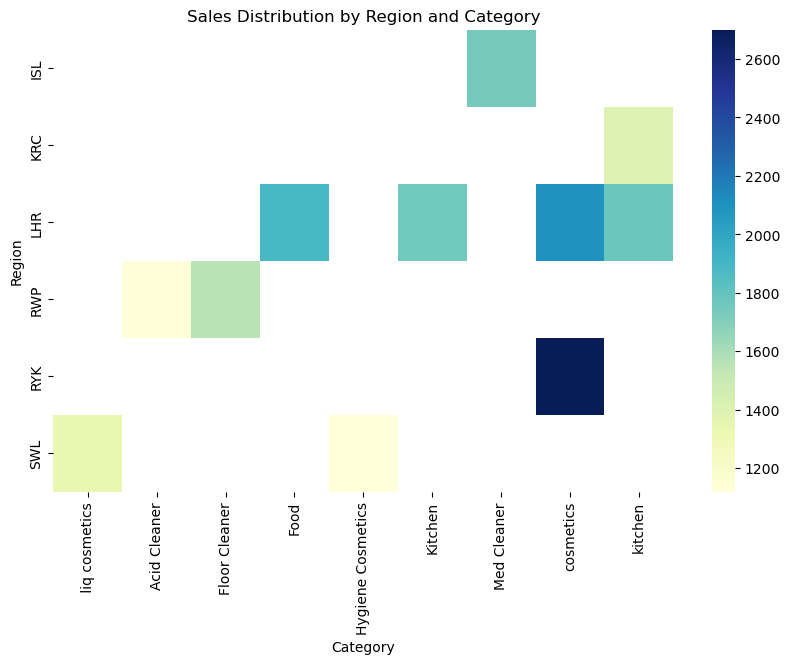

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index[:10], y=product_sales['TotalPrice'][:10])
plt.xticks(rotation=90)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pd.pivot_table(df, values='TotalPrice', index='Region', columns='Category', aggfunc='sum'), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Sales Distribution by Region and Category')
plt.show()


we are getting the warning issue a